<a href="https://colab.research.google.com/github/nuralfir/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library yang digunakan untuk scraping:
*   `requests` = membuat HTTP request di python
*   `BeautifulSoup` = menarik informasi dan data HTML & XML pada website
*   `Pandas` = analisis dan manipulasi data





In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Membuat user-agent agar tidak di-block oleh web server dan membuat request

In [ ]:
url = "https://www.tokopedia.com/asus/product"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
r = requests.get(url, headers=headers) #request HTTP ke web server

Inspect element pada website, cari `div` yang memuat link setiap produk yang nantinya akan ditarik datanya

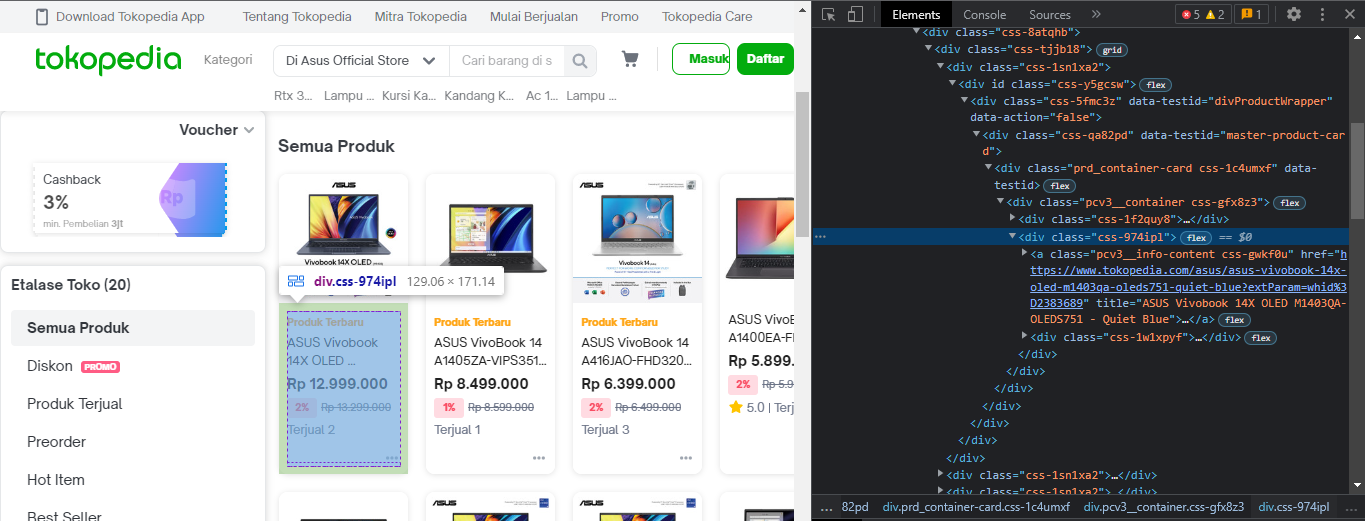

Scrape informasi (produk dengan harga dan rating) di web menggunakan library BeautifulSoup

In [ ]:
soup=BeautifulSoup(r.content,'html.parser')
print(soup.prettify()) #menampilkan hasil scrape data dalam format indentasi (lebih rapi)

<!DOCTYPE html>
<html lang="id" translate="no">
 <head>
  <title data-rh="true">
   Asus Official Store - Produk Resmi &amp; Terlengkap | Tokopedia
  </title>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
  <link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/>
  <link href="https://assets.tokopedia.net" nonce="vWiXjqcLO9nlYl9Uiz8aSw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/>
  <link href="https://gql.tokopedia.com" nonce="vWiXjqcLO9nlYl9Uiz8aSw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" nonce="vWiXjqcLO9nlYl9Uiz8aSw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" nonce="vWiXjqcLO9nlYl9Ui

Ekstrak elemen data produk yang terletak pada tag `div` dan `class` yang sesuai

In [ ]:
productlist = soup.find_all("div",{"class":"css-974ipl"})
productlist

[<div class="css-974ipl"><style data-emotion-css="gwkf0u">.css-gwkf0u{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-flex-flow:column;-ms-flex-flow:column;flex-flow:column;-webkit-box-flex:1;-webkit-flex-grow:1;-ms-flex-positive:1;flex-grow:1;text-align:left;}</style><a class="pcv3__info-content css-gwkf0u" href="https://www.tokopedia.com/asus/asus-vivobook-14x-oled-m1403qa-oleds752-transparent-silver?extParam=whid%3D2383689" title="ASUS Vivobook 14X OLED M1403QA-OLEDS752 - Transparent Silver"><style data-emotion-css="3um8ox">.css-3um8ox{display:block;color:var(--NN950,#212121);font-size:0.86rem;line-height:1.5;max-width:100%;max-height:100%;white-space:pre-wrap;word-break:keep-all;text-overflow:ellipsis;overflow:hidden;margin-bottom:4px;min-height:16px;display:-webkit-box;display:-moz-box;-webkit-line-clamp:2;-webkit-box-orient:vertical;}</style><div class="prd_link-product-name css-3um8ox" data-testid="linkProductName">ASUS Vivobook 14X OLED M1403QA

Ekstrak link setiap produk yang ada pada list `productlist`

In [ ]:
productlinks = []
for product in productlist:
    link = product.find("a",{"class":"pcv3__info-content css-gwkf0u"}).get('href')
    productlinks.append(link)

productlinks

['https://www.tokopedia.com/asus/asus-vivobook-14x-oled-m1403qa-oleds752-transparent-silver?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-14x-oled-m1403qa-oleds751-quiet-blue?extParam=whid%3D5931369',
 'https://www.tokopedia.com/asus/asus-vivobook-14-a1405za-vips351-indie-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-14-a1400ea-vips351-indie-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-14-a1400ea-fhd7524-indie-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-14-a1400ea-fhd7522-transparent-silver?extParam=whid%3D5931369',
 'https://www.tokopedia.com/asus/asus-zenbook-14-flip-oled-un5401qa-oleds913-jade-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-zenbook-14x-oled-um5401ra-oleds912-jade-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-pro-15-oled-k6502hc-oleds952-cool-silver?extParam=whid%3D2383689',
 'https://w

Diketahui pada `productlinks`, hanya bisa ditarik 10 link produk dari web. Dan setelah ditelusuri, website menggunakan load scrolling untuk menampilkan keseluruhan barang. Maka dari itu, akan menggunakan library Selenium untuk mengatasi hal tersebut